In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#loading the dataset

df = pd.read_csv('D:\Machine-learning-from-scratch\Multiclass-LogisticRegression\Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop(columns=['Id'],inplace =True)

In [6]:
df.shape

(150, 5)

In [7]:
x=df.iloc[:,:-1]
y=df['Species']

### applying custom label encoder on labels

In [8]:
from My_custom_preprocessing_utilis import My_custom_label_encoder

le = My_custom_label_encoder()
y= le.fit_transform(y)




### spilitting using custom train_test_split class

In [10]:
from My_custom_preprocessing_utilis import my_train_test_split

obj = my_train_test_split(x,y,test_size=0.10 , random_state=True , shuffle=True)

X_train , X_test , y_train , y_test = obj.split()


### scaling data using custom standard scaler class

In [11]:
from My_custom_preprocessing_utilis import My_standard_Scalar

sc = My_standard_Scalar()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training model using custom Multiclass logisticRegression class

In [12]:
from My_custom_multiclass_LogisticRegression import My_Multiclass_logisticRegression

model = My_Multiclass_logisticRegression(X_train , y_train , learning_rate=0.1 , epochs=500)

model.fit()

[EPOCH : 0  | loss : 1.0986]
[EPOCH : 100  | loss : 0.3343]
[EPOCH : 200  | loss : 0.2639]
[EPOCH : 300  | loss : 0.2224]
[EPOCH : 400  | loss : 0.1943]


### Evaluation model 

In [14]:
y_pred_classes = model.predict(X_test)    

def My_accuracy_score( y_test , y_pred):
    correct = np.sum(y_test == y_pred)
    total = len(y_test)
    return correct / total


print('Accuracy score : ',My_accuracy_score(y_test , y_pred_classes))

""""
Note:
since the dataset is very low just 150 rows  , model has memorized data , but overall the whole idea was just to implement 
custom multiclass logistic regression using numpy and it implemented well :)


"""

Accuracy score :  1.0


'"\nNote:\nsince the dataset is very low just 150 rows  , model has memorized data , but overall the whole idea was just to implement \ncustom multiclass logistic regression using numpy and it implemented well :)\n\n\n'

In [15]:
print("Sample predictions:", y_pred_classes[:15])
print("True labels:", y_test[:15])

Sample predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0]
True labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0]


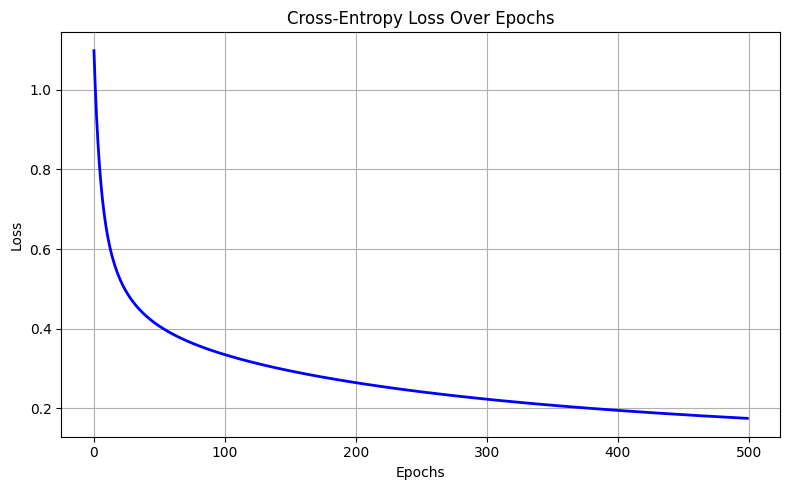

In [16]:
model.plot_loss()